### Inc. 5000 Analysis

We have the dataset for Inc.5000 released in 2018 for the interval of 2014 to 2017. This dataset provides information about the top 5000 companies that have been established before 2014 and have started generating revenue of at least 1 million in the given interval. Let us look at the dataset and find the top 25 companies in the list.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change file path when running in a different system
# Load data
file_path = r"E:\Assignments\Python\Assignment"
inc_5000_data = pd.read_excel(file_path+'\\HW4_inc5000-2018.xlsx')

# Changing index to RANK
inc_5000_data = inc_5000_data.set_index('RANK')

In [3]:
# Number of companies in the dataset
number_companies = len(inc_5000_data)
print(f'The total number of companies on the dataset: {number_companies}')

# Top 25 companies
print('Top 25 Companies')
inc_5000_data.head(25)

The total number of companies on the dataset: 5000
Top 25 Companies


,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",Unnamed: 14,Unnamed: 15
RANK,,,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,Wisconsin,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI",Makes software for the logistics industry that...,During stints as a freight broker and shipping...
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,Colorado,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO","Makes self-adhesive, collapsible, expandable c...",Frustrated with his iPhone headphones getting ...
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,Colorado,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO",NaN,NaN
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,Arizona,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ",NaN,NaN
6,https://www.inc.com/profile/aeronux-airways,Marietta,20005.2390,17,Aeronux Airways,aeronux.com,Georgia,GA,21874500,30066,2011.0,Logistics & Transportation,"Atlanta-Sandy Springs-Roswell, GA",NaN,NaN
7,https://www.inc.com/profile/diamond-assets,Milton,19717.5129,41,Diamond Assets,diamond-assets.com,Wisconsin,WI,43084462,53563,2014.0,Computer Hardware,"Janesville, WI",NaN,NaN
8,https://www.inc.com/profile/gforce-life-sciences,Chicago,16426.6575,13,GForce Life Sciences,http://gforcestaff.com,Illinois,IL,16893384,60606,2013.0,Human Resources,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
8,https://www.inc.com/profile/flexport,San Francisco,15911.2237,532,Flexport,http://flexport.com,California,CA,224745864,94102,2013.0,Logistics & Transportation,"San Francisco-Oakland-Hayward, CA",NaN,NaN


### Dataset cleaning:

From observing the dataset, it can be noticed that the dataset is not clean. We have to make modifications to the dataset to make it more readable and tidy for analysis.

In [4]:
# Modification 1
# Modifying column name
inc_5000_data = inc_5000_data.rename(columns={'REVENUW': 'REVENUE','Unnamed: 14': 'PRODUCT DESCRIPTION','Unnamed: 15':'COMPANY DESCRIPTION','STATE': 'STATE CODE', 'CITY.1': 'STATE', 'CITY, STATE': 'BRANCH CITY, STATE'})

# Modification 2
# Formatting WEBSITE COLUMN
inc_5000_data.WEBSITE = inc_5000_data.WEBSITE.str.replace('http://', '')
inc_5000_data.WEBSITE  = 'https://' + inc_5000_data.WEBSITE

### Using states by region dataset

To get more insights about the location, we need the details of the region. Hence we extract the values of region from another dataset and merge it with our dataset.

In [5]:
# Loading states by region dataset
state_by_region = pd.read_csv(file_path+'\\HW4_states_by_region.csv')
state_by_region.columns = map(str.upper, state_by_region.columns)

# Adding REGION column to the companies dataset
inc_5000_data = pd.merge(inc_5000_data,state_by_region,on=['STATE CODE','STATE'], how='inner')
inc_5000_data.drop(['DIVISION'],axis = 1)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,STATE CODE,REVENUE,ZIP CODE,FOUNDED,INDUSTRY,"BRANCH CITY, STATE",PRODUCT DESCRIPTION,COMPANY DESCRIPTION,REGION
0,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,https://swanleap.com,Wisconsin,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI",Makes software for the logistics industry that...,During stints as a freight broker and shipping...,Midwest
1,https://www.inc.com/profile/diamond-assets,Milton,19717.5129,41,Diamond Assets,https://diamond-assets.com,Wisconsin,WI,43084462,53563,2014.0,Computer Hardware,"Janesville, WI",NaN,NaN,Midwest
2,https://www.inc.com/profile/driftless-glen-dis...,Baraboo,1560.9738,30,Driftless Glen Distillery,https://driftlessglen.com,Wisconsin,WI,1952209,53913,2014.0,Food & Beverage,"Baraboo, WI",NaN,NaN,Midwest
3,https://www.inc.com/profile/techcanary,Milwaukee,1257.8574,23,TechCanary,https://techcanary.com,Wisconsin,WI,2747380,53205,2011.0,Software,"Milwaukee-Waukesha-West Allis, WI",NaN,NaN,Midwest
4,https://www.inc.com/profile/penrod,Milwaukee,1053.4302,54,Penrod,https://penrod.co,Wisconsin,WI,6182040,53202,2012.0,Software,"Milwaukee-Waukesha-West Allis, WI",NaN,NaN,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,https://www.inc.com/profile/compass-it-compliance,North Providence,62.2153,20,Compass IT Compliance,https://compassitc.com,Rhode Island,RI,3134000,2904,2010.0,Security,"Providence-New Bedford-Fall River, RI-MA",NaN,NaN,Northeast
4992,https://www.inc.com/profile/blackrock-construc...,South Burlington,166.5271,7,BlackRock Construction,https://blackrockus.com,Vermont,VT,4452935,5495,2012.0,Construction,"Burlington-South Burlington, VT",NaN,NaN,Northeast
4993,https://www.inc.com/profile/jamaica-cottage-shop,South Londonderry,89.4283,32,Jamaica Cottage Shop,https://jamaicacottageshop.com,Vermont,VT,3678119,5155,1995.0,Manufacturing,NaN,NaN,NaN,Northeast
4994,https://www.inc.com/profile/marathon-health,Winooski,82.9275,541,Marathon Health,https://marathon-health.com,Vermont,VT,69719393,5404,2005.0,Health,"Burlington-South Burlington, VT",NaN,NaN,Northeast


### Revenue

Revenue in one of the important factors we have to analyze in the given dataset. Let us start with descriptive analysis and make inferences with the values obtained.

In [6]:
# Descriptive statistics for revenue
revenue = inc_5000_data.REVENUE
revenue_min = revenue.min()
revenue_max = revenue.max()
revenue_median = revenue.median()
revenue_std = revenue.std()
companies = inc_5000_data[inc_5000_data.REVENUE>=50000000]
companies_percentage = (len(companies)/len(inc_5000_data))*100

# Printing the descriptive statistics details
print(f'Percentage of companies found prior to 2015 having at least 50 million revenue: {companies_percentage:.2f} %')
print(f'The minimum revenue: {revenue_min:.2f}')
print(f'The maximum revenue: {revenue_max:.2f}')
print(f'The median of revenue: {revenue_median:.2f}')
print(f'The standard deviation of revenue: {revenue_std:.2f}')

Percentage of companies found prior to 2015 having at least 50 million revenue: 13.63 %
The minimum revenue: 1952209.00
The maximum revenue: 16433210000.00
The median of revenue: 9575009.50
The standard deviation of revenue: 283102280.77


### Inferences for Revenue

From the descriptive statistics of the revenue for the companies, we can see that only 13.63% of the companies are generating revenue greater than 50 million. We can also see a huge deviation in the distribution of the revenue. One possible reason is that the list companies are diverse in terms of both size and domain. Some companies are well established in the industry and some have been recently started. 
The time frame analyzed in the dataset is when the United States recovered from the 2008 recession. As the demand for goods and services increased, the number of successful startups also increased. These startups though they were successful, didn't get revenue as high as already established firms (high deviation in the descriptive statistics).

### Creating dataframes based on categories:

Let us create a function that will return a dataframe with N rows based on the category and value entered by the user. Using this function we can create many subset dataframes from the main dataframe. This will help us for in-depth analysis of specific categories.

In [7]:
# Function to return n rows based on category and value
def inc_fun(df,category = 'None',value = 'None',row_number = 10):
    if (category == 'None') or (value == 'None'):
        return df.sort_values(by='REVENUE',ascending=False).head(row_number)
    else:
        return df[df[category] == value].sort_values(by='REVENUE',ascending=False).head(row_number)

In [8]:
# Creating dataframes
# The top 15 companies
top15 = inc_fun(inc_5000_data,row_number = 15)
top15

In [9]:
# The top 10 companies in the Food & Beverage industries
top10_food_beverage = inc_fun(inc_5000_data,'INDUSTRY','Food & Beverage',row_number = 10)
top10_food_beverage

In [10]:
# The top 3 companies located in New York City
top3_new_york = inc_fun(inc_5000_data,'CITY','New York City',row_number = 3)
top3_new_york

In [11]:
# The top 5 companies located in Maryland 
top5_maryland = inc_fun(inc_5000_data,'STATE','Maryland',row_number = 5)
top5_maryland

### Awards

We have a dataset that has list of companies from different industries. For the year 2014 to 2017, Inc.5000 has decide to give special awards for companies in the service industry. They will be awarding companies that come under service industry. For the companies in top quarter, **Trailblazer** award is given. For companies in the top half and not in top quarter will be given **Pioneer** award.

In [12]:
# Filtering companies in the service industry
services = inc_5000_data[inc_5000_data.INDUSTRY.str.contains("Services")].sort_values(by='REVENUE',ascending=False).reset_index()
services = services.rename(columns = {'index': 'RANK'})

# Creating a column for awards
services['AWARD'] = ''

# Mapping awards to the companies that made to the top half in the service industry
top_half = len(services)//2
top_quarter = len(services)//4
services_awards = services.head(top_half)
services_awards.loc[:top_quarter,'AWARD'] = "Trailblazer"
services_awards.loc[top_quarter:,'AWARD'] = "Pioneer"

# Displaying the company details
services_awards[['COMPANY NAME','RANK','REVENUE','AWARD']]

,COMPANY NAME,RANK,REVENUE,AWARD
0,Carahsoft Technology,1820,4107537719,Trailblazer
1,DriveTime,515,3267077000,Trailblazer
2,SRS Distribution,3880,2183778171,Trailblazer
3,Insight Global,754,1928758851,Trailblazer
4,Jeunesse Global,2139,1300731294,Trailblazer
...,...,...,...,...
634,Rastaclat,1176,9544805,Pioneer
635,2M Research,3588,9540000,Pioneer
636,Language on Demand,1633,9529200,Pioneer
637,Next Day Dumpsters,2986,9504000,Pioneer


### Further Analysis

We have already analyzed revenue generated by the companies. To get more insights about revenue we can check for trends in revenues by different industries and the number of employees of a company.

### Revenue for different industry

Let us plot graphs for total revenue of different industries. This will give us insights on whether there is a dominant industry in the given list.

[Text(0.5, 0, 'Revenue in Millions'), Text(0, 0.5, 'Industry')]

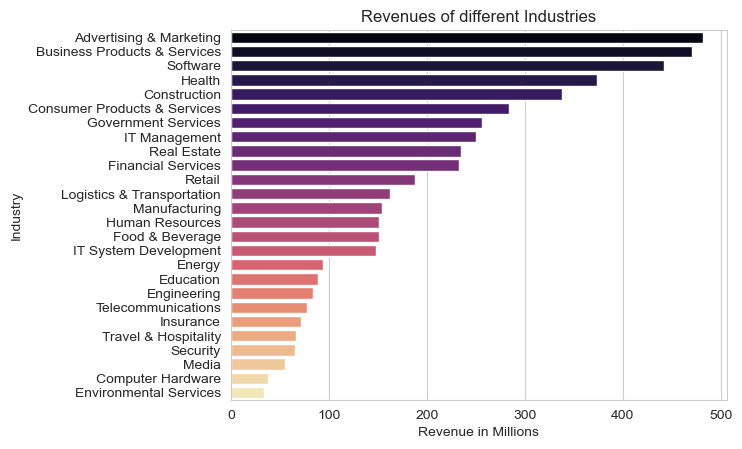

In [13]:
# Plotting graph for revenues of industries
values, frequencies = np.unique(inc_5000_data.INDUSTRY, return_counts = True)
df = pd.DataFrame({"Industry": values, "Revenue": frequencies})
title = 'Revenues of different Industries'
sns.set_style('whitegrid')
axes = sns.barplot(x=frequencies,y=values,palette='magma',data=df, order=df.sort_values('Revenue',ascending=False).Industry)
axes.set_title(title)
axes.set(xlabel = 'Revenue in Millions',ylabel = 'Industry')

### Inferences for Revenue of different industries

It can be observed that advertising & marketing, business poducts & services and software industry has achieved a revenue of more than 400 million USD. 
From the above observation, the following can be inferred:<br>
In the years 2014 to 2017, there was shift towards digital businesses. Advertising and marketing industry started venturing into digital businesses by providing services like search engine optimisation, online advertising and content creation. Many digital platforms were developed to keep up with the demand. All these factors could be one of the possible reason to explain our observation.


### Employees

The size of the company is often determined by the number of employees working in it. Let us analyze how many small scale companies are in the list that were able to generate more than a million revenue.

In [14]:
# Creating bins for number of employees
bins = [0, 500, 1000, 10000, 100000, 200000]
inc_5000_data['EMPLOYEES_GROUP'] = pd.cut(inc_5000_data['EMPLOYEES'], bins)
grouped = inc_5000_data.groupby(by=inc_5000_data['EMPLOYEES_GROUP'])
for name, group in grouped:
    print(name, len(group))

(0, 500] 4686
(500, 1000] 165
(1000, 10000] 128
(10000, 100000] 6
(100000, 200000] 1


### Inferences for Number of Employees

It can be observed that more than 4500 companies have 500 and less employees. It can be inferred that many small to medium scale companies generated revenue of more than 1 million in the given time period of 2014 to 2017. These companies have effectively utilized the opportunities available in the market and found methods to capitalize and get high revenues. One other reason could be that these companies were able to meet the demands of the people faster than well established companies. 

Disclaimer: This analysis is based on the given dataset. Always verify the data with the latest updates.